### **REQUIRED MODULES**


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from statsmodels.iolib.smpickle import load_pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **DATASET**

In [2]:
url = 'https://raw.githubusercontent.com/Shubhamag12/House-Price-Prediction/main/Delhi.csv'
df = pd.read_csv(url)

### **SUMMARIZING DATA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                4998 non-null   int64 
 1   Area                 4998 non-null   int64 
 2   Location             4998 non-null   object
 3   No. of Bedrooms      4998 non-null   int64 
 4   Resale               4998 non-null   int64 
 5   MaintenanceStaff     4998 non-null   int64 
 6   Gymnasium            4998 non-null   int64 
 7   SwimmingPool         4998 non-null   int64 
 8   LandscapedGardens    4998 non-null   int64 
 9   JoggingTrack         4998 non-null   int64 
 10  RainWaterHarvesting  4998 non-null   int64 
 11  IndoorGames          4998 non-null   int64 
 12  ShoppingMall         4998 non-null   int64 
 13  Intercom             4998 non-null   int64 
 14  SportsFacility       4998 non-null   int64 
 15  ATM                  4998 non-null   int64 
 16  ClubHo

In [4]:
df.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,4.998000e+03,4998.000000,4998.000000,4998.00000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.00000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.00000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,1.588638e+07,1277.343737,2.657863,0.80012,5.423770,5.472589,5.415966,5.435574,5.412765,5.437975,5.398359,5.398960,5.570228,5.487795,5.39916,5.460184,5.399560,5.423770,5.530812,5.490996,5.407163,5.399360,5.402961,5.39916,5.408363,5.562225,5.426971,5.394958,5.534014,5.655662,5.416367,5.456783,5.413165,5.394958,5.415566,5.408764,5.412965,5.394958,5.411565
std,4.612894e+07,915.217800,0.820605,0.39995,4.378355,4.322819,4.387116,4.365041,4.390702,4.362324,4.406770,4.406103,4.207849,4.305261,4.40588,4.337050,4.405435,4.378355,4.254905,4.301549,4.396963,4.405658,4.401649,4.40588,4.395623,4.217476,4.374752,4.410549,4.251116,4.102704,4.386668,4.340938,4.390254,4.410549,4.387565,4.395176,4.390478,4.410549,4.392045
min,2.000000e+06,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.900000e+06,800.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.500000e+06,1000.000000,3.000000,1.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.580000e+07,1650.000000,3.000000,1.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,8.546000e+08,16000.000000,8.000000,1.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


### **PREPARING KEY METRIC**

In [5]:
df['PricePA'] = df['Price']/ df['Area']

In [6]:
df['PricePA'].head()

0     8750.000000
1     6000.000000
2    11111.111111
3     5747.126437
4     6444.444444
Name: PricePA, dtype: float64

### **DATA VISUALIZATION**

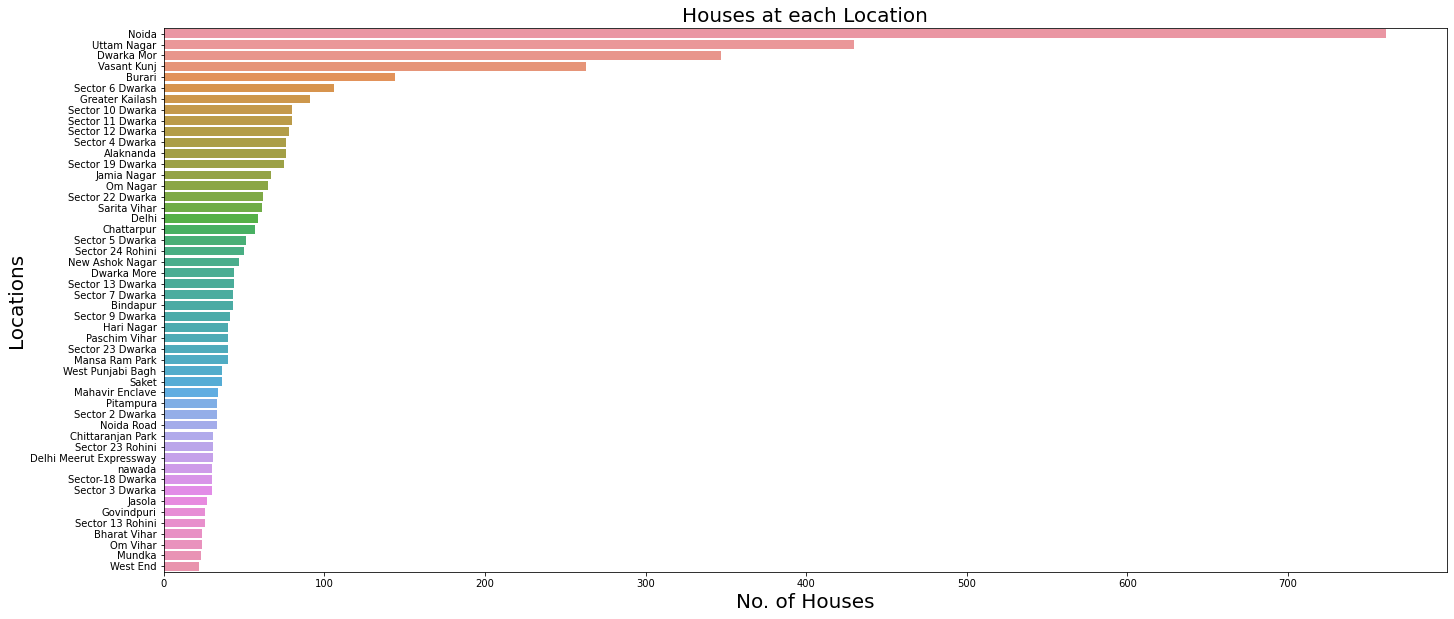

In [7]:
fig,ax=plt.subplots(figsize=(23,10))
ax.set_title('Houses at each Location',fontsize=20)
sns.countplot(y='Location',data=df, order=df.Location.value_counts().index[:50])
ax.set_xlabel('No. of Houses' ,fontsize=20)
ax.set_ylabel('Locations',fontsize=20)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


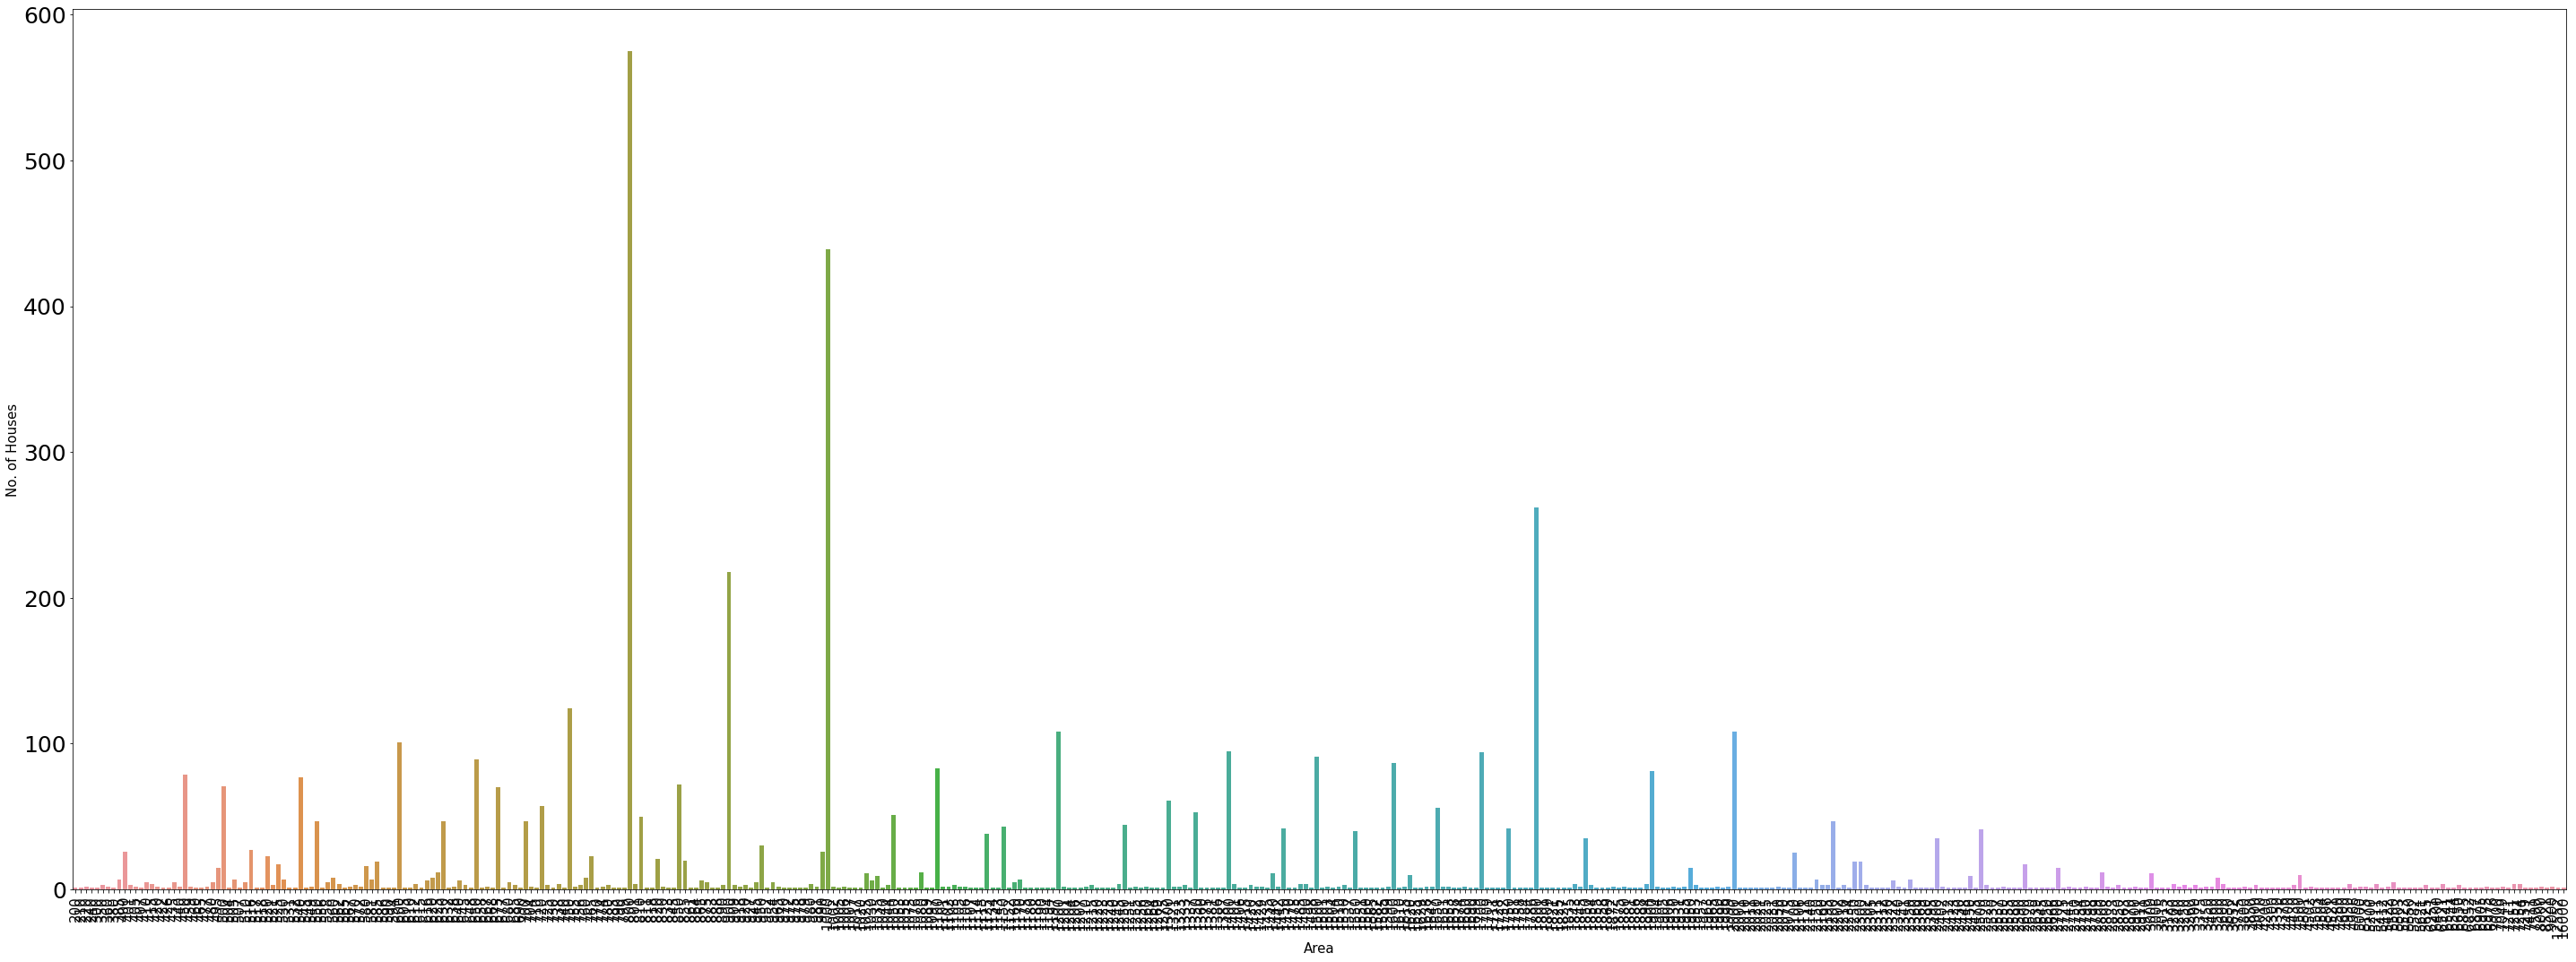

In [8]:
fig=plt.figure(figsize=(40,15))
sns.countplot(df['Area'])
plt.xlabel('Area',fontsize=15)
plt.ylabel('No. of Houses',fontsize=15)
plt.xticks(rotation=90, fontsize = 15)
plt.yticks(fontsize = 25)
plt.tight_layout(pad=1)
plt.show()

In [9]:
def dist_plot (feature, color, position=121):
    plt.figure(figsize=(20,5))
    plt.subplot(position)
    sns.boxplot(x=feature, data=df, color=color)
    plt.subplot(position+1)
    sns.distplot(df[feature], color=color)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

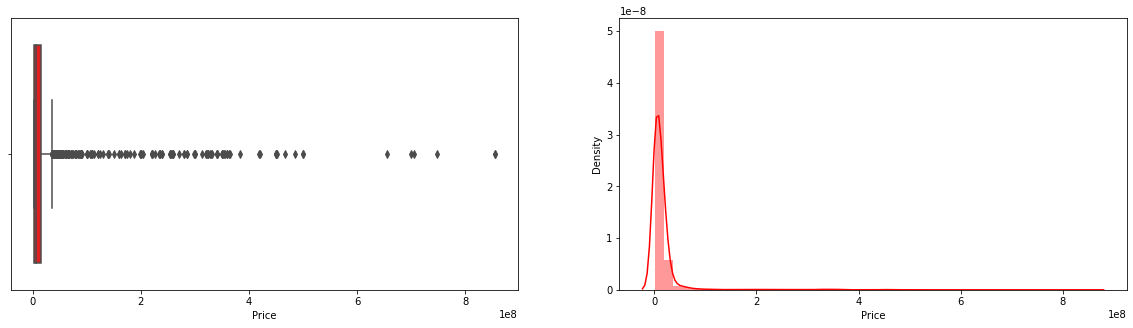

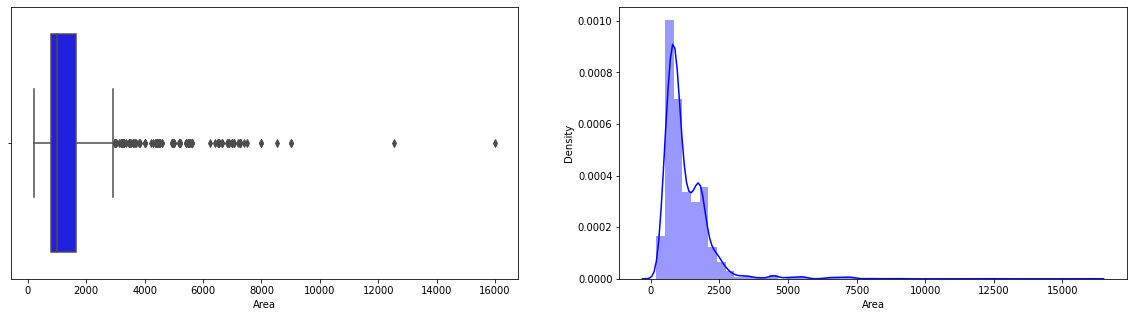

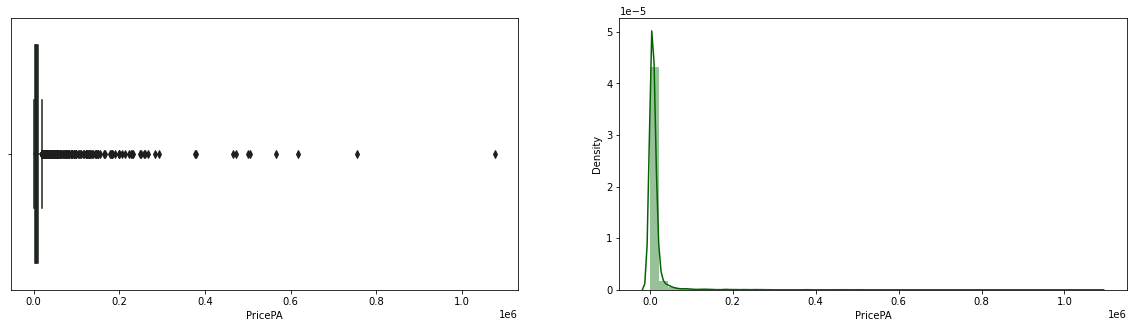

In [10]:
dist_plot('Price', 'red')
dist_plot('Area', 'blue')
dist_plot('PricePA', 'darkgreen')

### **REMOVING OUTLIERS**

In [11]:
price_pa_outliers = np.percentile(df.PricePA, [15,90])
price_outliers = np.percentile(df.Price, [5,90])
area_outliers = np.percentile(df.Area, [5,90])

price_pa_filter = (df.PricePA > price_pa_outliers[0]) & (df.PricePA < price_pa_outliers[1])
price_filter = (df.Price > price_outliers[0]) & (df.Price < price_outliers[1])
area_filter = (df.Area > area_outliers[0]) & (df.Area < area_outliers[1])

df = df[(price_pa_filter) & (price_filter) & (area_filter)]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

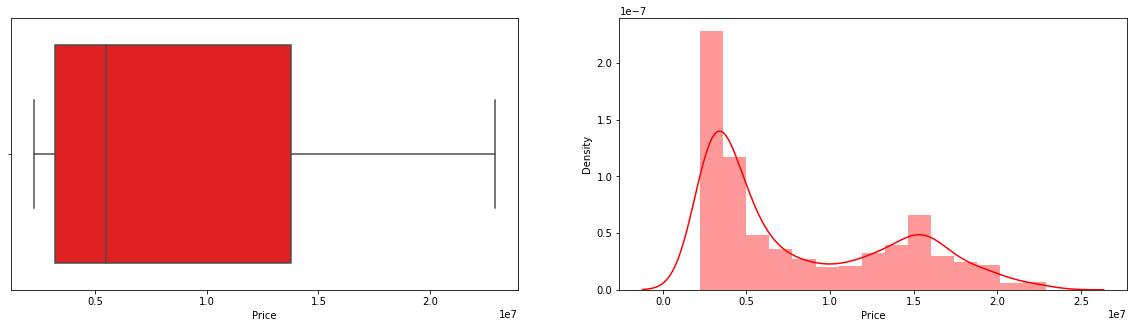

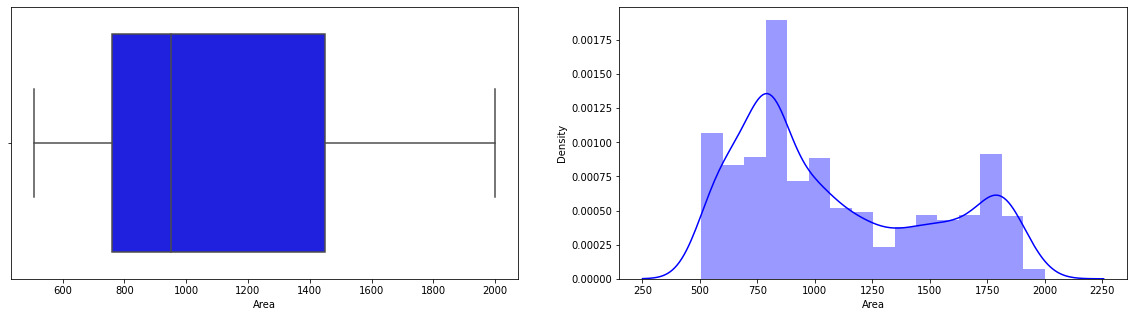

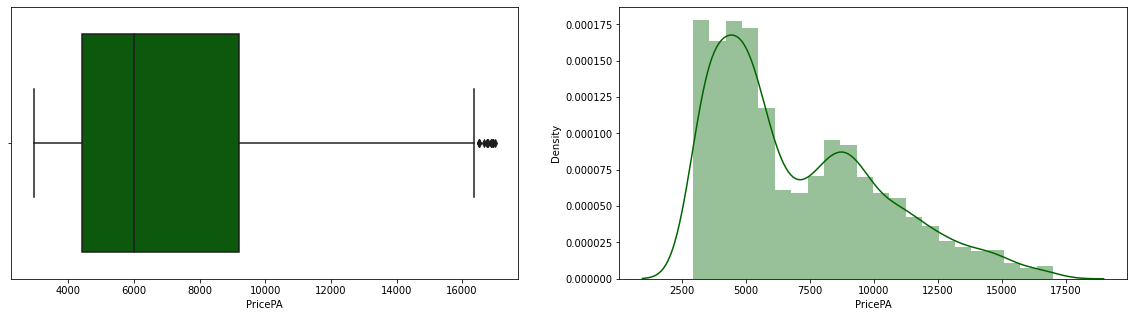

In [12]:
dist_plot('Price', 'red')
dist_plot('Area', 'blue')
dist_plot('PricePA', 'darkgreen')

**Data Cleaning**

In [13]:
df.rename(columns={'No. of Bedrooms': 'Bedrooms' , "Children'splayarea":'PlayArea'}, inplace=True)
df['PlayArea']

0       1
1       0
2       0
4       0
5       1
       ..
4986    9
4987    9
4993    9
4994    9
4997    9
Name: PlayArea, Length: 3031, dtype: int64

**Setting priority of different factors**

In [14]:
attribute_dict = {'MaintenanceStaff':2, 'Gymnasium':4, 'SwimmingPool':4,'LandscapedGardens':3, 'JoggingTrack':3, 'RainWaterHarvesting':2,'IndoorGames':3, 'ShoppingMall':2, 'Intercom':2, 'SportsFacility':3, 'ATM':2, 'ClubHouse':2, 'School':2, '24X7Security':1, 'PowerBackup':4, 'CarParking':3, 'StaffQuarter':0, 'Cafeteria':0, 'MultipurposeRoom':2, 'Hospital':3, 'WashingMachine':0, 'Gasconnection':2, 'AC':0, 'Wifi':0, 'PlayArea':3, 'LiftAvailable':0, 'BED':0, 'VaastuCompliant':0, 'Microwave':0, 'GolfCourse':0, 'TV':0, 'DiningTable':0, 'Sofa':0, 'Wardrobe':0, 'Refrigerator':0}
attributes = pd.DataFrame(attribute_dict.items(), columns=['Attribute', 'Weight'])
attributes

,Attribute,Weight
0,MaintenanceStaff,2
1,Gymnasium,4
2,SwimmingPool,4
3,LandscapedGardens,3
4,JoggingTrack,3
5,RainWaterHarvesting,2
6,IndoorGames,3
7,ShoppingMall,2
8,Intercom,2
9,SportsFacility,3


In [15]:
attributes_matrix = df[['MaintenanceStaff', 'Gymnasium', 'SwimmingPool',
       'LandscapedGardens', 'JoggingTrack', 'RainWaterHarvesting',
       'IndoorGames', 'ShoppingMall', 'Intercom', 'SportsFacility', 'ATM',
       'ClubHouse', 'School', '24X7Security', 'PowerBackup', 'CarParking',
       'StaffQuarter', 'Cafeteria', 'MultipurposeRoom', 'Hospital',
       'WashingMachine', 'Gasconnection', 'AC', 'Wifi', 'PlayArea',
       'LiftAvailable', 'BED', 'VaastuCompliant', 'Microwave',
       'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Refrigerator']]

attributes_matrix

,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,PlayArea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,1,1,0,1,1,0,0,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
4987,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
4993,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
4994,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [16]:
attributes_matrix.replace(9, 0, inplace=True)
attribute_scores_df = np.dot(attributes_matrix, attributes['Weight'])
df['AttributeScore'] = attribute_scores_df
df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4384: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Price,Area,Location,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,PlayArea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,PricePA,AttributeScore
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,8750.000000,25
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6000.000000,9
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11111.111111,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6444.444444,3
5,15800000,1800,Sector 7 Dwarka,4,1,0,1,1,0,1,1,0,0,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,8777.777778,30


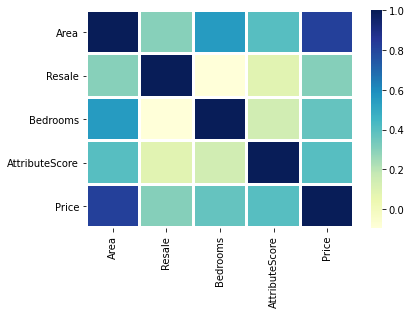

In [17]:
corr_df = df[['Area', 'Resale', 'Bedrooms', 'AttributeScore', 'Price']]
sns.heatmap(corr_df.corr(method='pearson'), cmap='YlGnBu', linewidths=2)

In [18]:
location_pivot = pd.pivot_table(data=df, index='Location', aggfunc='mean', values='PricePA')
location_pivot['LocationPremium'] = location_pivot['PricePA'] / location_pivot['PricePA'].min()
location_pivot.sort_values('LocationPremium', ascending=False)
df = pd.merge(df, location_pivot['LocationPremium'], on='Location')
df['LogPremium'] = np.log(df['LocationPremium'])

In [19]:
df

,Price,Area,Location,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,PlayArea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,PricePA,AttributeScore,LocationPremium,LogPremium
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,8750.000000,25,3.062484,1.119226
1,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,8750.000000,25,3.062484,1.119226
2,16200000,1600,Sector 10 Dwarka,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10125.000000,0,3.062484,1.119226
3,17000000,1900,Sector 10 Dwarka,3,1,0,1,1,0,1,1,0,0,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,8947.368421,28,3.062484,1.119226
4,15500000,1600,Sector 10 Dwarka,3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,9687.500000,14,3.062484,1.119226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,3200000,760,Rajpur,2,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,4210.526316,0,1.206041,0.187343
3027,2250000,760,Rajpur,2,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,2960.526316,0,1.206041,0.187343
3028,18500000,1800,Dwarka sec 6,3,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10277.777778,0,3.457071,1.240422
3029,2500000,540,Madhu Vihar,2,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,4629.629630,0,1.712963,0.538225


### **MODEL SELECTION**

In [20]:
x = df[['Area', 'AttributeScore', 'Resale', 'LogPremium', 'Bedrooms']]
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19)

**OLS MODEL**

In [21]:
model = sm.OLS(y_train, x_train).fit()

In [22]:
model.save("ols_results_delhi.pickle")
from google.colab import files
files.download('ols_results_delhi.pickle') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Predicted Test Prices')

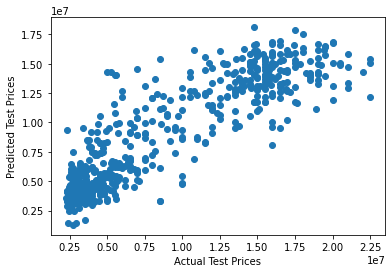

In [23]:
predictions = model.predict(x_test)
plt.scatter(x=y_test, y=predictions)
plt.xlabel('Actual Test Prices')
plt.ylabel('Predicted Test Prices')

In [24]:
print('Parameters: ', model.params)
print('\n------------------------------------')
print('\nStandard errors: ', model.bse)
print('\n------------------------------------')
print('\nPredicted values: ', model.predict())
print('\n------------------------------------')
print('\nRsquare Value: ', model.rsquared*100)

Parameters:  Area              8.417780e+03
AttributeScore    2.708558e+04
Resale           -6.953979e+05
LogPremium        5.716650e+06
Bedrooms         -1.875490e+06
dtype: float64

------------------------------------

Standard errors:  Area                 198.948315
AttributeScore      7794.348188
Resale            125763.072459
LogPremium        165849.147400
Bedrooms           69536.026832
dtype: float64

------------------------------------

Predicted values:  [14143230.22160967  8305639.0749141   3022307.96929525 ...
 13633276.3416364   3313032.46712162 13916078.72607065]

------------------------------------

Rsquare Value:  92.99868136485539


**Linear Regression Model**

In [25]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Predicted Test Prices')

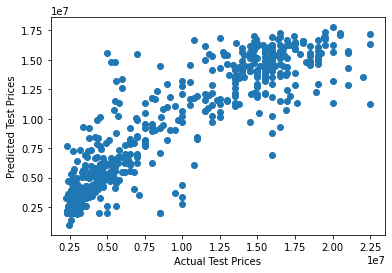

In [26]:
predictions = model.predict(x_test)
plt.scatter(x=y_test, y=predictions)
plt.xlabel('Actual Test Prices')
plt.ylabel('Predicted Test Prices')

In [27]:
print("Train set score (lr.score): {:2f}".format(model.score(x_train, y_train)*100))
print("Test set score (lr.score): {:2f}".format(model.score(x_test, y_test)*100))
print(metrics.mean_absolute_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Train set score (lr.score): 82.804788
Test set score (lr.score): 81.705317
1662735.7860694116
2483251.760592652
